In [54]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

In [17]:
df=pd.read_csv("export.csv")

In [18]:
df.head()

,year,GDPpercapita
0,1960,89.035241
1,1961,97.595274
2,1962,100.122116
3,1963,101.901415
4,1964,100.221114


In [19]:
df = df.set_index('year')

In [20]:
df.head()

,GDPpercapita
year,
1960,89.035241
1961,97.595274
1962,100.122116
1963,101.901415
1964,100.221114


In [21]:
df.tail()

,GDPpercapita
year,
2015,1248.453398
2016,1401.620628
2017,1563.913699
2018,1698.350394
2019,1855.739824


In [42]:
df.describe()

,GDPpercapita
count,60.000000
mean,433.206977
std,416.486734
min,89.035241
25%,140.898555
50%,289.494815
75%,481.334425
max,1855.739824


In [22]:
df.isnull().sum()

GDPpercapita    0
dtype: int64

<AxesSubplot:xlabel='year'>

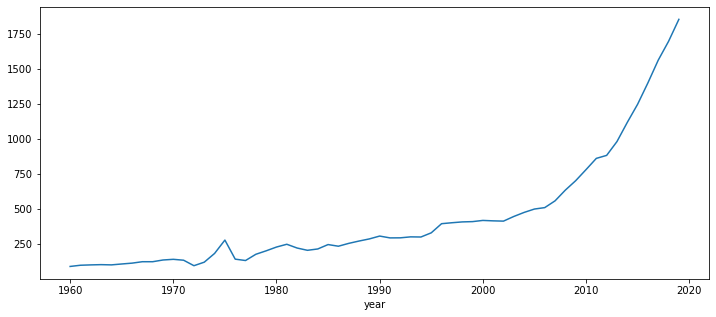

In [43]:
df['GDPpercapita'].plot(figsize=(12,5))

In [23]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)

In [24]:
adf_test(df['GDPpercapita'])

1. ADF :  5.61968415429842
2. P-Value :  1.0
3. Num Of Lags :  2
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 57
5. Critical Values :
	 1% :  -3.5506699942762414
	 5% :  -2.913766394626147
	 10% :  -2.5946240473991997


In [45]:
df_transformed = df.diff()
df_transformed = df_transformed.dropna()

In [46]:
adf_test(df_transformed)

1. ADF :  2.8186352036420788
2. P-Value :  1.0
3. Num Of Lags :  6
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 52
5. Critical Values :
	 1% :  -3.562878534649522
	 5% :  -2.918973284023669
	 10% :  -2.597393446745562


In [47]:
df_transformed = df_transformed.diff().dropna()
adf_test(df_transformed)

1. ADF :  -5.912264500989273
2. P-Value :  2.6219407083833004e-07
3. Num Of Lags :  4
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 53
5. Critical Values :
	 1% :  -3.560242358792829
	 5% :  -2.9178502070837
	 10% :  -2.5967964150943397


In [51]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf

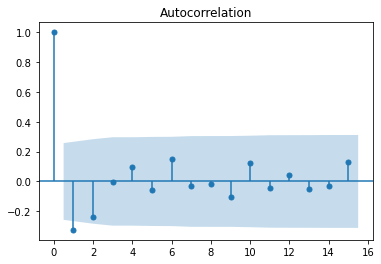

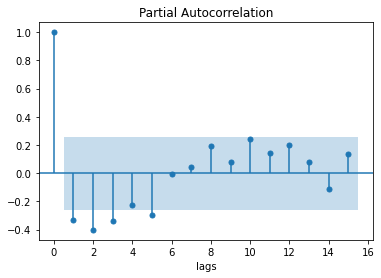

In [57]:
plot_acf(df_transformed, lags=15)
plot_pacf(df_transformed, lags=15)
plt.xlabel('lags')
plt.show()

In [25]:
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [27]:
stepwise_fit = auto_arima(df['GDPpercapita'], 
                          suppress_warnings=True)           

stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   60
Model:               SARIMAX(1, 2, 2)   Log Likelihood                -288.738
Date:                Fri, 03 Sep 2021   AIC                            585.476
Time:                        23:06:44   BIC                            593.717
Sample:                             0   HQIC                           588.686
                                 - 60                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7763      0.100      7.787      0.000       0.581       0.972
ma.L1         -1.8282      0.231     -7.911      0.000      -2.281      -1.375
ma.L2          0.9777      0.251      3.897      0.000       0.486       1.469
sigma2      1133.3228    262.474      4.318      0.000     618.884    1647.762
===================================================================================
Ljung-Box (L1) (Q):                   1.72   Jarque-Bera (JB):                61.36
Prob(Q):                              0.19   Prob(JB):                         0.00
Heteroskedasticity (H):               0.55   Skew:                            -0.91
Prob(H) (two-sided):                  0.20   Kurtosis:                         7.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [28]:
from statsmodels.tsa.arima_model import ARIMA

In [29]:
print(df.shape)
train=df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape,test.shape)
print(test.iloc[0],test.iloc[-1])

(60, 1)
(30, 1) (30, 1)
GDPpercapita    306.268704
Name: 1990, dtype: float64 GDPpercapita    1855.739824
Name: 2019, dtype: float64


In [30]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(df['GDPpercapita'],order=(1,2,2))
model1=model.fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:        D2.GDPpercapita   No. Observations:                   58
Model:                 ARIMA(1, 2, 2)   Log Likelihood                -290.975
Method:                       css-mle   S.D. of innovations             36.304
Date:                Fri, 03 Sep 2021   AIC                            591.950
Time:                        23:07:33   BIC                            602.253
Sample:                             2   HQIC                           595.963
                                                                              
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     2.4756      1.394      1.775      0.076      -0.257       5.209
ar.L1.D2.GDPpercapita    -0.3198      0.405     -0.789      0.430      -1.114       0.474
ma.L1.D2.GDPpercapita    -0.2795      0.375     -0.745      0.456      -1.014       0.455
ma.L2.D2.GDPpercapita    -0.3557      0.260     -1.369      0.171      -0.865       0.154
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -3.1273           +0.0000j            3.1273            0.5000
MA.1            1.3293           +0.0000j            1.3293            0.0000
MA.2           -2.1151           +0.0000j            2.1151            0.5000
-----------------------------------------------------------------------------
"""

In [58]:
from statsmodels.tsa.arima_model import ARIMA
model2=ARIMA(df['GDPpercapita'],order=(0,2,1))
model2=model2.fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:        D2.GDPpercapita   No. Observations:                   58
Model:                 ARIMA(0, 2, 1)   Log Likelihood                -291.628
Method:                       css-mle   S.D. of innovations             36.704
Date:                Sat, 04 Sep 2021   AIC                            589.256
Time:                        00:42:08   BIC                            595.437
Sample:                             2   HQIC                           591.664
                                                                              
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     2.5058      1.427      1.756      0.079      -0.291       5.303
ma.L1.D2.GDPpercapita    -0.7176      0.082     -8.759      0.000      -0.878      -0.557
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.3936           +0.0000j            1.3936            0.0000
-----------------------------------------------------------------------------
"""

<AxesSubplot:xlabel='year'>

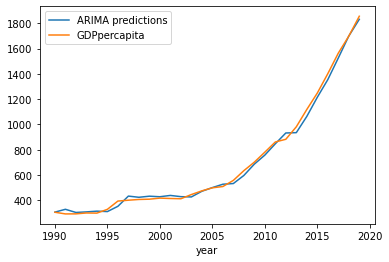

In [31]:
start=len(train)
end=len(train)+len(test)-1
pred=model1.predict(start=start,end=end,typ='levels').rename('ARIMA predictions')
#pred.index=index_future_dates
pred.plot(legend=True)
test['GDPpercapita'].plot(legend=True)

In [32]:
from sklearn.metrics import mean_squared_error,  mean_absolute_error

In [38]:
actual = test
predi = pred

# calcuate mean square error
mse = mean_squared_error(actual, predi)
# calculate mean absolute error
mae = mean_absolute_error(actual, predi)
# print results
print('The Mean Squared Error of  forecasts is {}'.format(round(mse, 2)))
print('The Mean Absolute Error of  forecasts is {}'.format(round(mae, 2)))
print('The Root Mean Squared Error of  forecasts is {}'.format(np.sqrt(mse)))

The Mean Squared Error of  forecasts is 781.84
The Mean Absolute Error of  forecasts is 23.65
The Root Mean Squared Error of  forecasts is 27.961468259112507


<AxesSubplot:xlabel='year'>

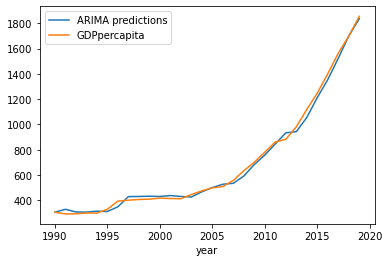

In [59]:
start=len(train)
end=len(train)+len(test)-1
pred2=model2.predict(start=start,end=end,typ='levels').rename('ARIMA predictions')
#pred.index=index_future_dates
pred2.plot(legend=True)
test['GDPpercapita'].plot(legend=True)

In [60]:
actual = test
predi = pred2

# calcuate mean square error
mse = mean_squared_error(actual, predi)
# calculate mean absolute error
mae = mean_absolute_error(actual, predi)
# print results
print('The Mean Squared Error of  forecasts is {}'.format(round(mse, 2)))
print('The Mean Absolute Error of  forecasts is {}'.format(round(mae, 2)))
print('The Root Mean Squared Error of  forecasts is {}'.format(np.sqrt(mse)))

The Mean Squared Error of  forecasts is 825.65
The Mean Absolute Error of  forecasts is 24.34
The Root Mean Squared Error of  forecasts is 28.734172576263877


In [18]:
actual

,GDPpercapita
year,
1990,306.268704
1991,293.160415
1992,293.644998
1993,300.555753
1994,299.533040
1995,329.424085
1996,394.717475
1997,401.498691
1998,407.429186


In [19]:
predi

year
1990     307.485189
1991     329.736487
1992     304.701948
1993     309.149942
1994     315.013543
1995     311.697742
1996     353.248984
1997     434.062712
1998     424.608874
1999     433.282804
2000     428.890199
2001     439.279792
2002     429.588840
2003     427.285365
2004     472.111894
2005     501.243341
2006     527.804380
2007     533.269899
2008     597.039421
2009     686.648204
2010     758.035326
2011     847.581189
2012     932.896721
2013     935.541038
2014    1063.865868
2015    1215.058284
2016    1354.799330
2017    1525.554916
2018    1699.181492
2019    1831.550490
Name: ARIMA predictions, dtype: float64

In [20]:
len(df.GDPpercapita)

60

# Holt's Method

In [21]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing,SimpleExpSmoothing, Holt

In [22]:
holt=Holt(df.GDPpercapita,exponential=True).fit()

In [23]:
holt_pred = holt.predict(start=start, end=end)

In [24]:
actual = test
predh = holt_pred

# calcuate mean square error
mse = mean_squared_error(actual, predh)
# calculate mean absolute error
mae = mean_absolute_error(actual, predh)

# print results
print('The Mean Squared Error of  forecasts is {}'.format(round(mse, 2)))
print('The Mean Absolute Error of  forecasts is {}'.format(round(mae, 2)))
print('The Root Mean Squared Error of  forecasts is {}'.format(np.sqrt(mse)))


The Mean Squared Error of  forecasts is 816.87
The Mean Absolute Error of  forecasts is 24.38
The Root Mean Squared Error of  forecasts is 28.580942516809316


In [25]:
holt_pred

year
1990     313.336910
1991     335.717386
1992     321.540780
1993     321.988766
1994     329.525377
1995     328.448418
1996     361.038993
1997     432.424470
1998     440.207557
1999     446.714156
2000     449.051424
2001     458.358369
2002     455.095969
2003     452.942958
2004     489.167008
2005     520.967011
2006     547.495442
2007     558.735836
2008     611.587785
2009     695.773817
2010     769.598526
2011     856.029240
2012     944.399366
2013     968.154807
2014    1075.951715
2015    1225.953847
2016    1368.100803
2017    1535.905527
2018    1713.801971
2019    1861.372988
dtype: float64

<AxesSubplot:xlabel='year'>

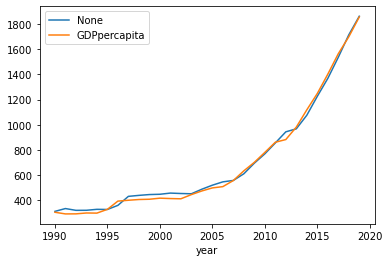

In [26]:
holt_pred.plot(legend=True)
test['GDPpercapita'].plot(legend=True)

In [27]:
len(test)

30

In [28]:
pred

year
1990     307.485189
1991     329.736487
1992     304.701948
1993     309.149942
1994     315.013543
1995     311.697742
1996     353.248984
1997     434.062712
1998     424.608874
1999     433.282804
2000     428.890199
2001     439.279792
2002     429.588840
2003     427.285365
2004     472.111894
2005     501.243341
2006     527.804380
2007     533.269899
2008     597.039421
2009     686.648204
2010     758.035326
2011     847.581189
2012     932.896721
2013     935.541038
2014    1063.865868
2015    1215.058284
2016    1354.799330
2017    1525.554916
2018    1699.181492
2019    1831.550490
Name: ARIMA predictions, dtype: float64

In [29]:
pred.to_excel('save_file.xlsx')